# column명 한글 > 영어로 변경.
df.rename(columns={  
    '축제명': 'Festival',  
    'index_y': 'name_year',  
    '시작월': 'month',  
    '개최년도': 'year',  
    '(전체)방문자수': 'visitors',  
    '총비용': 'cost'  
}, inplace=True)

In [1]:
import pandas as pd

data1 = pd.read_csv("../data/전국연도별방문자회계정보정말정말최종ver.csv")

columns_to_extract = ['축제명', 'index_y', '시작월', '개최년도', '(전체)방문자수', '총비용']

df = data1[columns_to_extract].copy()

df.head()


,축제명,index_y,시작월,개최년도,(전체)방문자수,총비용
0,강경젓갈축제,강경젓갈축제2018,10.0,2018,110041,8.250000e+08
1,강경젓갈축제,강경젓갈축제2022,10.0,2022,127900,1.003000e+09
2,강경젓갈축제,강경젓갈축제2023,10.0,2023,124299,1.178086e+09
3,강릉커피축제,강릉커피축제2018,10.0,2018,144268,3.904450e+08
4,강릉커피축제,강릉커피축제2019,10.0,2019,160896,4.400000e+08


In [2]:
# column명 한글 > 영어로 변경.
df.rename(columns={
    '축제명': 'Festival',
    'index_y': 'name_year',
    '시작월': 'month',
    '개최년도': 'year',
    '(전체)방문자수': 'visitors',
    '총비용': 'cost'
}, inplace=True)

df = df.dropna(subset=['month'])
df['month'] = df['month'].astype(int) 

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')

df['visit/cost'] = df['visitors'] / df['cost']


df.head()

,Festival,name_year,month,year,visitors,cost,date,visit/cost
0,강경젓갈축제,강경젓갈축제2018,10,2018,110041,8.250000e+08,2018-10-01,0.000133
1,강경젓갈축제,강경젓갈축제2022,10,2022,127900,1.003000e+09,2022-10-01,0.000128
2,강경젓갈축제,강경젓갈축제2023,10,2023,124299,1.178086e+09,2023-10-01,0.000106
3,강릉커피축제,강릉커피축제2018,10,2018,144268,3.904450e+08,2018-10-01,0.000369
4,강릉커피축제,강릉커피축제2019,10,2019,160896,4.400000e+08,2019-10-01,0.000366


# IQR

In [3]:
#iqr로 clip 해주는 함수

def iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df_clipped = df.copy()
    
    for column in columns:
        df_clipped[column] = df[column].clip(lower=lower[column], upper=upper[column])
        
    return df_clipped

df_grouped = df.groupby('date')[['visitors', 'cost', 'visit/cost']].mean()

columns_to_check = ['visitors', 'cost', 'visit/cost']
df_iqr = iqr(df_grouped, columns_to_check)

df_iqr.head()


,visitors,cost,visit/cost
date,,,
2018-01-01,297563.250,2.187776e+09,0.000155
2018-03-01,220763.500,1.164075e+09,0.000176
2018-04-01,143191.800,1.023438e+09,0.000152
2018-05-01,147641.125,8.488898e+08,0.000245
2018-06-01,39979.000,1.082710e+09,0.000037


# 점선은 clip으로 전처리 된 라인, 실선은 clip처리 된 것이 아니라 원본 데이터.
몇몇 이상치가 너무 크게 나와서 clip을 통해 전처리.

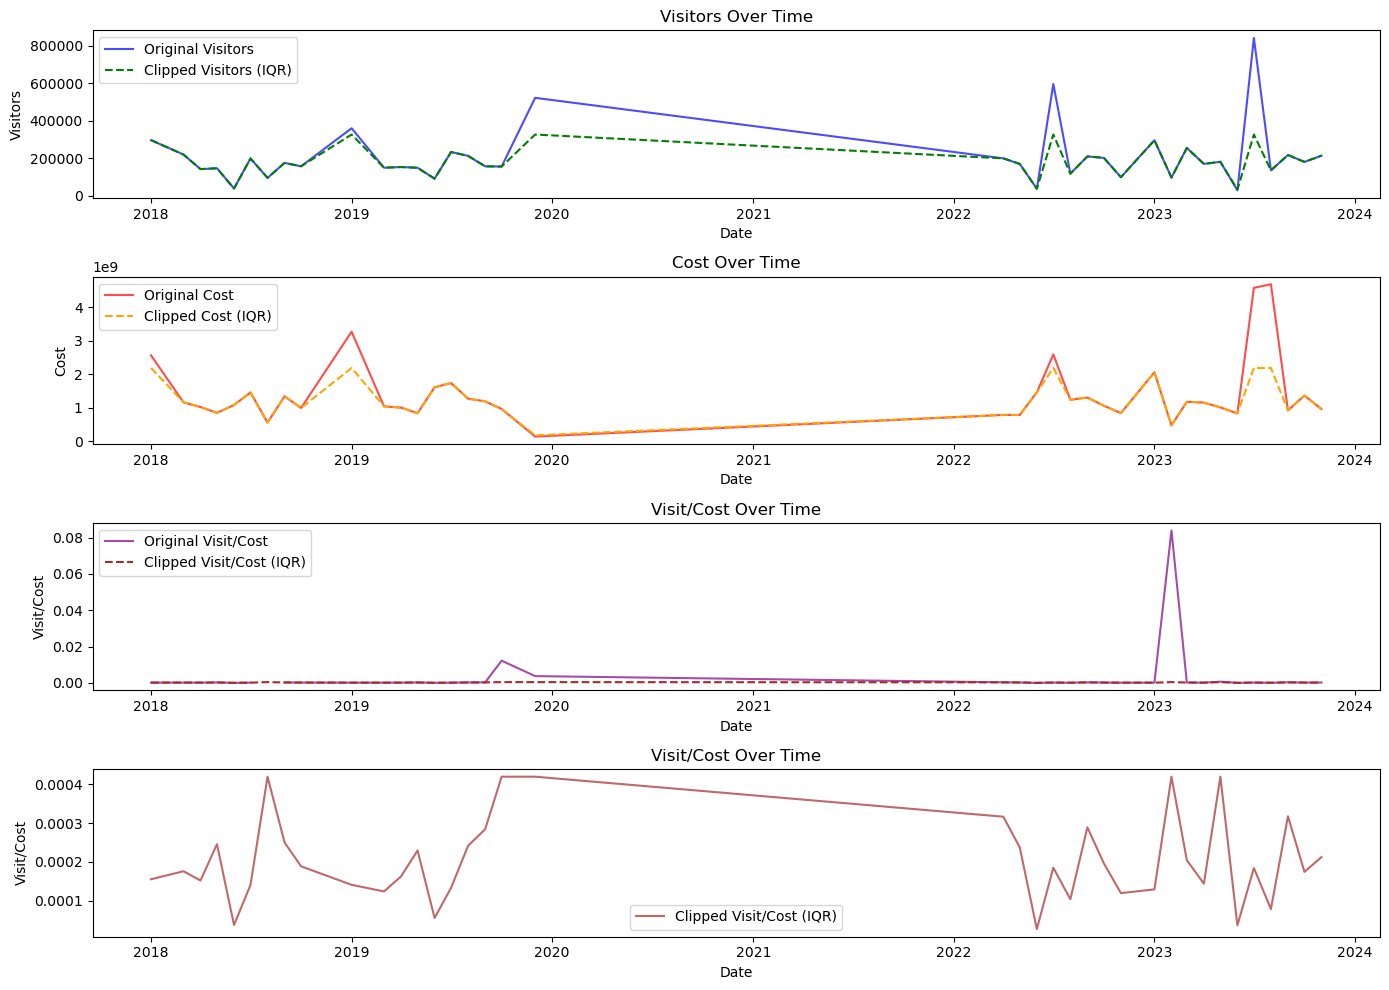

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# 'visitors'
plt.subplot(4, 1, 1)
plt.plot(df_grouped.index, df_grouped['visitors'], label='Original Visitors', color='blue', alpha=0.7)
plt.plot(df_iqr.index, df_iqr['visitors'], label='Clipped Visitors (IQR)', color='green', linestyle='--')
plt.title('Visitors Over Time')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()

# 'cost' 
plt.subplot(4, 1, 2)
plt.plot(df_grouped.index, df_grouped['cost'], label='Original Cost', color='red', alpha=0.7)
plt.plot(df_iqr.index, df_iqr['cost'], label='Clipped Cost (IQR)', color='orange', linestyle='--')
plt.title('Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()

# 'visit/cost' 
plt.subplot(4, 1, 3)
plt.plot(df_grouped.index, df_grouped['visit/cost'], label='Original Visit/Cost', color='purple', alpha=0.7)
plt.plot(df_iqr.index, df_iqr['visit/cost'], label='Clipped Visit/Cost (IQR)', color='brown', linestyle='--')
plt.title('Visit/Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Visit/Cost')
plt.legend()

# 'visit/cost' clip
plt.subplot(4, 1, 4)
plt.plot(df_iqr.index, df_iqr['visit/cost'], label='Clipped Visit/Cost (IQR)', color='brown', alpha=0.7)
plt.title('Visit/Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Visit/Cost')
plt.legend()


# 그래프 출력
plt.tight_layout()
plt.show()


# 연령대 별 category 구분.
장년층 : 

map = {  
    '장년층': 'old',  
    '가족': 'family',  
    '청년': 'youth'} 

In [5]:
age_group = pd.read_csv("../data/연령대별구분.csv")

age_group.rename(columns={'축제명': 'Festival'}, inplace=True)

df = df.merge(age_group[['Festival', 'target']], on='Festival', how='left')

map = {
    '장년층': 'old',
    '가족': 'family',
    '청년': 'youth'}

df['target'] = df['target'].map(map)

df.to_csv('./df.csv')

df.head()



,Festival,name_year,month,year,visitors,cost,date,visit/cost,target
0,강경젓갈축제,강경젓갈축제2018,10,2018,110041,8.250000e+08,2018-10-01,0.000133,old
1,강경젓갈축제,강경젓갈축제2022,10,2022,127900,1.003000e+09,2022-10-01,0.000128,old
2,강경젓갈축제,강경젓갈축제2023,10,2023,124299,1.178086e+09,2023-10-01,0.000106,old
3,강릉커피축제,강릉커피축제2018,10,2018,144268,3.904450e+08,2018-10-01,0.000369,family
4,강릉커피축제,강릉커피축제2019,10,2019,160896,4.400000e+08,2019-10-01,0.000366,family


# 아래의 scatterplot을 통해 target을 어디로 잡느냐에 따라 어느 월을 대상으로 하면 좋을지도 어느정도 유추 가능.

 특징으로는 중장년층 타겟과 청년들 타겟 축제의 경우, 돈을 얼마를 쓰던 visit/cost는 비슷하게 유지되지만,
 가족 타겟 축제의 경우 visit/cost가 특정 월에서 높아짐.  

 == 시기를 맞출 경우 가족 들이 방문하는 축제는 해당 축제에 지자체가 돈을 얼마를 썼냐보단
 언제 축제가 열렸느냐? 에 집중한 다는 것을 알 수 있음.

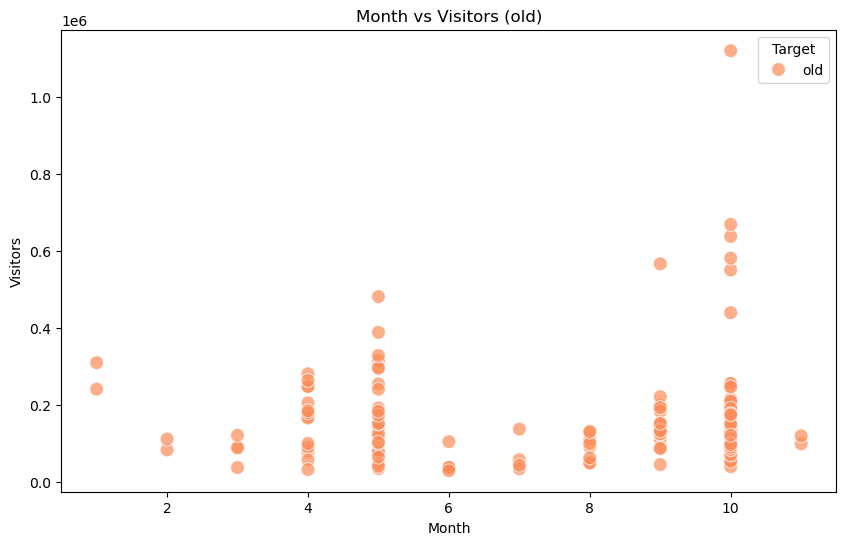

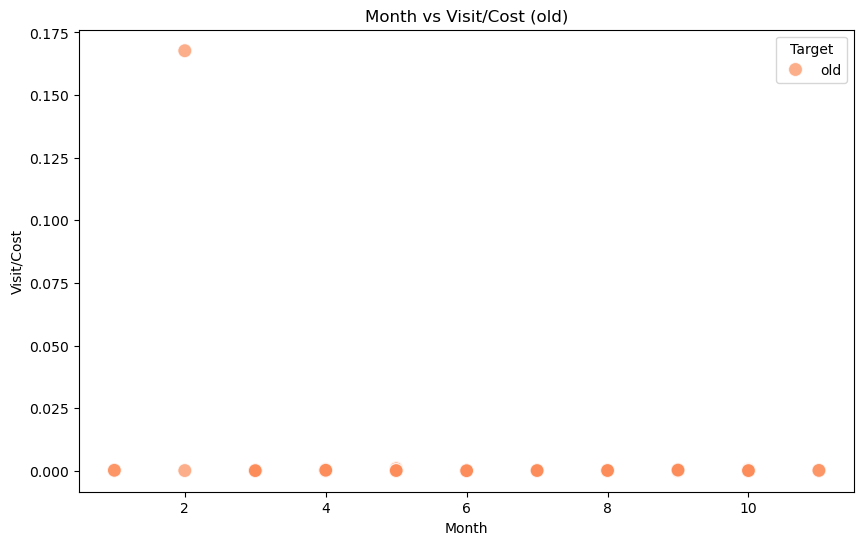

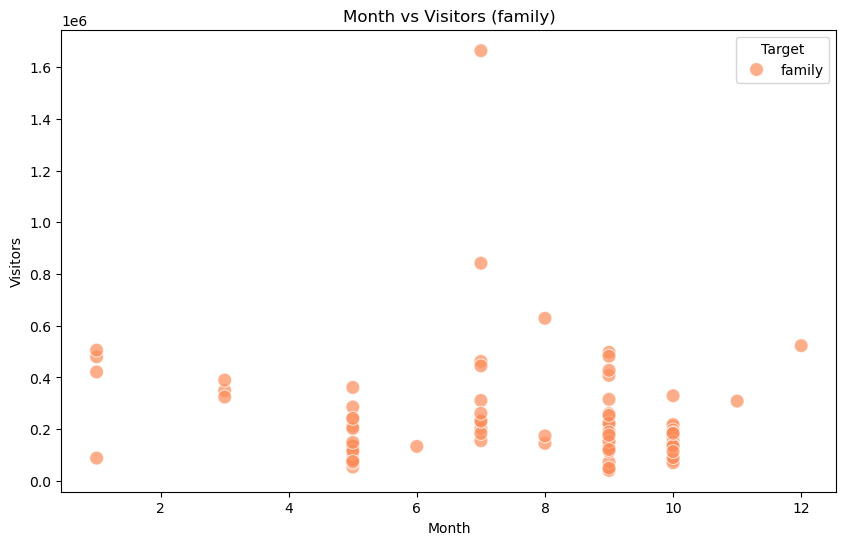

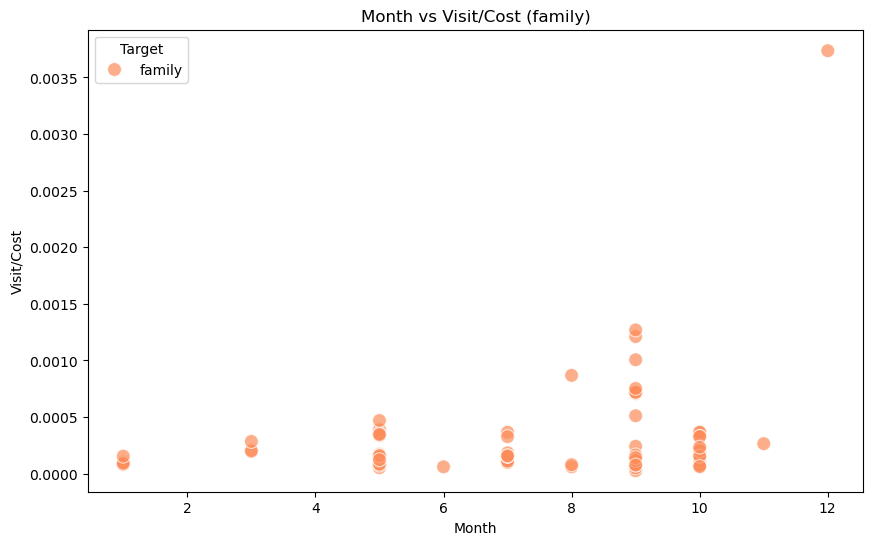

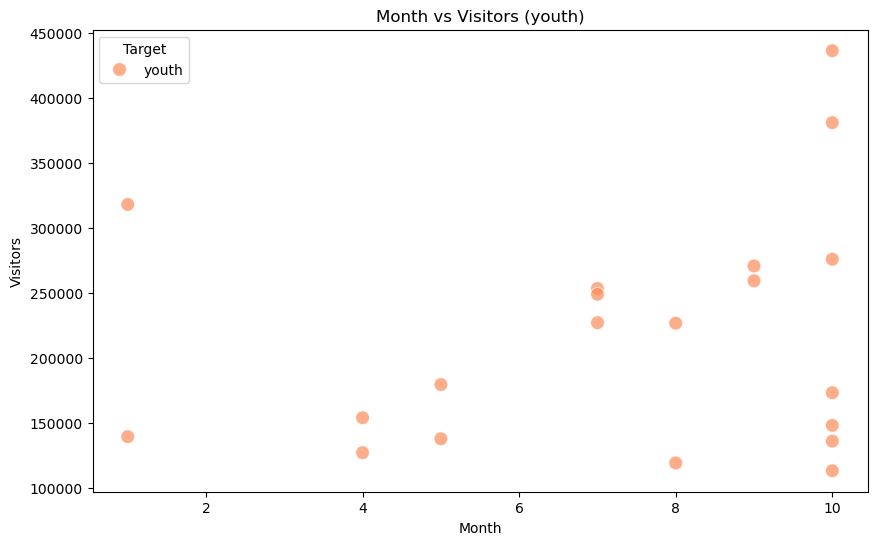

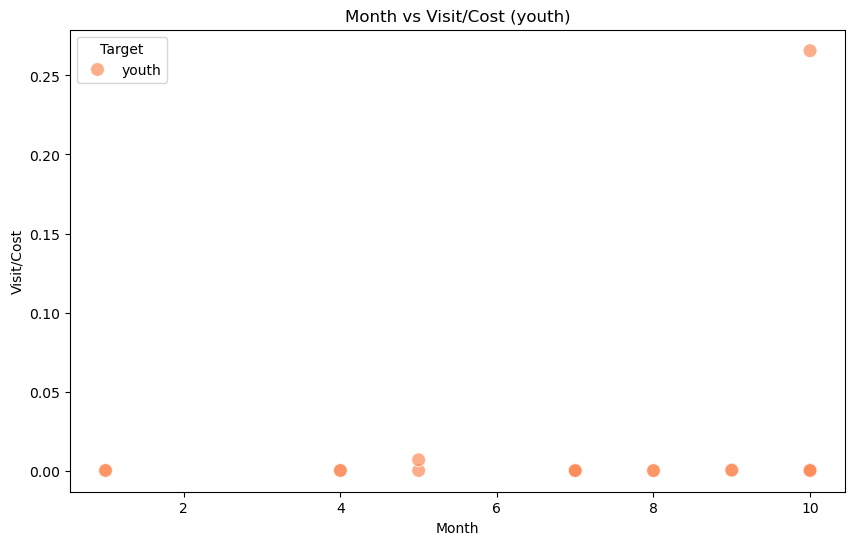

In [31]:
import seaborn as sns

targets = df['target'].unique()

for target in targets:
    df_target = df[df['target'] == target]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='month', y='visitors', hue='target', data=df_target, palette='OrRd', s=100, alpha=0.7)
    plt.title(f'Month vs Visitors ({target})')
    plt.xlabel('Month')
    plt.ylabel('Visitors')
    plt.legend(title='Target')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='month', y='visit/cost', hue='target', data=df_target, palette='OrRd', s=100, alpha=0.7)
    plt.title(f'Month vs Visit/Cost ({target})')
    plt.xlabel('Month')
    plt.ylabel('Visit/Cost')
    plt.legend(title='Target')
    plt.show()


# 축제별 지요 지표와 방문객 간 관련성

 '그룹명'  
 축제기간 : Fe  
 비축제기간 : non  
  
'구분명'  
 외부방문자 유입 : foreigner  
 현지인방문자 유입 : local  
 내비게이션 검색량 : navi  
 관광소비 : tour_fee  
 축제지 집중률 : festival_conc  

In [7]:
data2 = pd.read_csv('../data/df_charac.csv')

In [8]:
data2.columns

Index(['i', 'Festival', 'name_year', 'month', 'year', 'visitors', 'cost',
       'date', 'visit/cost', 'target', 'Fe_festival_conc', 'Fe_foreigner',
       'Fe_local', 'Fe_navi', 'Fe_tour_fee', 'non_festival_conc',
       'non_foreigner', 'non_local', 'non_navi', 'non_tour_fee'],
      dtype='object')

In [ ]:
cha_corr = data2.drop(columns = ['visitors',
                                  'visit/cost',
                                  'cost',
                                  'date', 
                                  'Festival',
                                  'name_year',
                                  'year',
                                  'target',
                                  'month',
                                  'i'])

cha_corr = cha_corr.corr()

<Axes: >

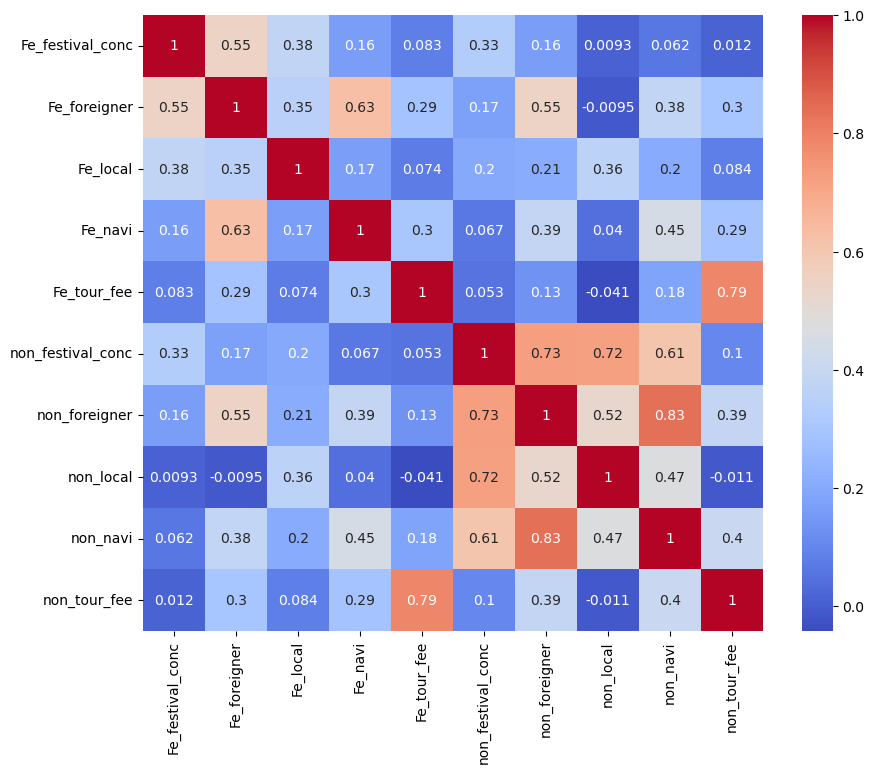

In [10]:

plt.figure(figsize=(10, 8))
sns.heatmap(cha_corr, annot=True, cmap='coolwarm')

# 히트맵에서 알 수 있는 것.

navigation 검색량과 외부인 방문객의 연관성은 상당히 높다. - 어찌보면 당연  
  

non_tour_fee와 Fe_tour_fee 사이 관련도도 상당히 높다.    
-두가지 추측이 가능. 평상시에도 외식 등의 비율이 높은 지방일 것이다  
or  
평상시에 관광 인프라가 잘 갖춰져 있어야 외지인 방문시에도 수익을 올릴 수 있다.
  
Fe_foreigner과 Fe_festival_conc 사이에도 연관이 있다.


In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms_target = ['cost', 'visitors', 'visit/cost']


visit_corr = data2.drop(['i', 
                        'name_year', 
                        'year',
                        'date',
                        'Festival',
                        'Fe_festival_conc', 
                        'Fe_foreigner',   
                        'Fe_local', 
                        'Fe_navi', 
                        'Fe_tour_fee', 
                        'non_festival_conc',       
                        'non_foreigner', 
                        'non_local', 
                        'non_navi', 
                        'non_tour_fee'], axis =1 )
visit_corr[mms_target] = visit_corr[mms_target].replace([float('inf'), float('-inf')], 0)
visit_corr[mms_target] = mms.fit_transform(visit_corr[mms_target])



visit_corr = pd.get_dummies(visit_corr, columns=['target', 'month'], drop_first=False)
visit_corr = visit_corr.corr()

<Axes: >

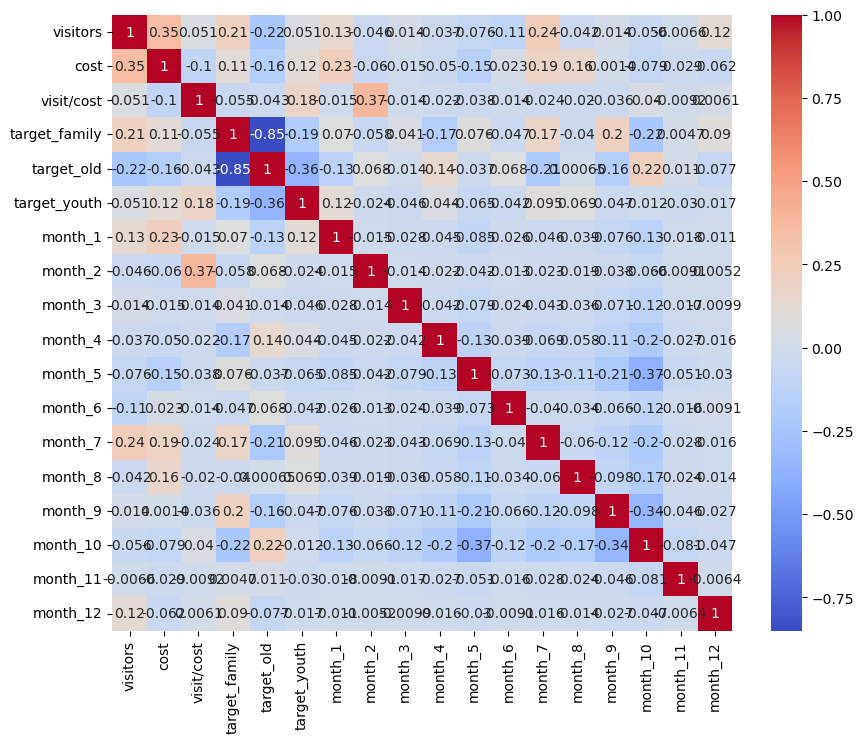

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(visit_corr, annot=True, cmap='coolwarm')

# 이상치가 처리된 값이어도 7월과 12월은 지표가 적어 정확하지 않음.  
2월의 visit/cost가 높게 찍힌것도 축제 수도 적고 효율이 좋게 개최되는 축제가 하나 있기 때문.  

따라서, visitors와 month를 상관관계로 분석하기 힘든편, 결국 축제가 많이 개최되는 메인 월인
5,6,7,8,9에는 그만큼 작은 축제도 많이 열려 visitors 수가 낮게 찍히는 경향이 있음.  

target과 month간 분석을 보는 것이 타당.  

실제로, 가족이 선호하는 축제 월과 중장년층이 선호하는 축제 월이 다르다는 것을 파악가능.